# This is the static chart verion 

[*********************100%***********************]  1 of 1 completed
/home/tester/Documents/code_algo_trade_management/.venv/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


Price       Adj Close  Close   High    Low   Open  Volume
Date                                                     
2020-01-02      0.392  0.392  0.408  0.392  0.408   29833
2020-01-03      0.400  0.400  0.408  0.400  0.408    9863
2020-01-06      0.400  0.400  0.424  0.384  0.424  104375
2020-01-07      0.392  0.392  0.392  0.376  0.392   32908
2020-01-08      0.384  0.384  0.392  0.384  0.392   83882


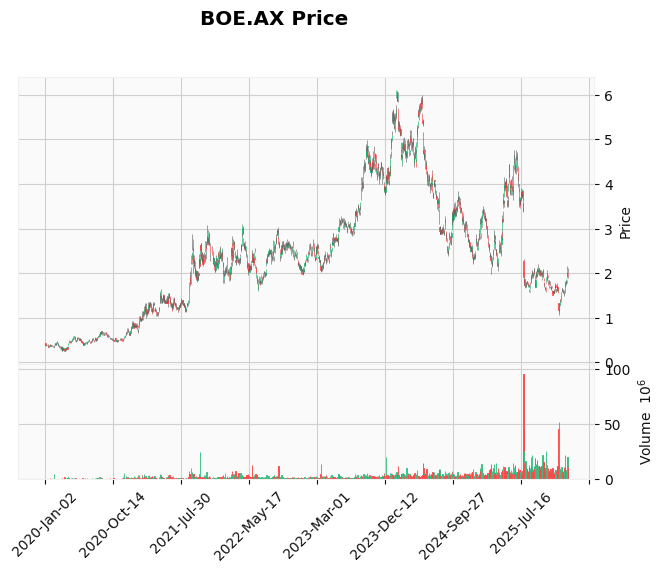

In [2]:
import yfinance as yf
import pandas as pd

import mplfinance as mpf  # extra lib for pour candle stick chart

ticker = "BOE.AX"

df = yf.download(
    "BOE.AX",
    start="2020-01-01",
    auto_adjust=False,   # no corporate action adjustment just raw price
    group_by="column"    # 
)
# above df has multi header rows
'''
Price      Adj Close  Close   High    Low   Open  Volume
Ticker        BOE.AX BOE.AX BOE.AX BOE.AX BOE.AX  BOE.AX
Date                                                    
2020-01-02     0.392  0.392  0.408  0.392  0.408   29833
2020-01-03     0.400  0.400  0.408  0.400  0.408    9863
2020-01-06     0.400  0.400  0.424  0.384  0.424  104375
2020-01-07     0.392  0.392  0.392  0.376  0.392   32908
'''

df = df.droplevel(1, axis=1) if isinstance(df.columns, pd.MultiIndex) else df  # remove second header, row
print(df.head())


# display chart using mplfinance
mpf.plot(
    df,
    type="candle",
    volume=True,
    style="yahoo",
    title="BOE.AX Price",
)

In [3]:
df = df.droplevel(1, axis=1) if isinstance(df.columns, pd.MultiIndex) else df  # remove second header, row
print(df.head())

Price       Adj Close  Close   High    Low   Open  Volume
Date                                                     
2020-01-02      0.392  0.392  0.408  0.392  0.408   29833
2020-01-03      0.400  0.400  0.408  0.400  0.408    9863
2020-01-06      0.400  0.400  0.424  0.384  0.424  104375
2020-01-07      0.392  0.392  0.392  0.376  0.392   32908
2020-01-08      0.384  0.384  0.392  0.384  0.392   83882


# Interactive chart version using mplfinance lib

In [4]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

import mplfinance as mpf  # extra lib for pour candle stick chart

ticker = "BOE.AX"

flag=False

if (flag==True):
    df = yf.download(
        "BOE.AX",
        start="2020-01-01",
        auto_adjust=False,   # no corporate action adjustment just raw price
        group_by="column"    # 
    )
    
# above df has multi header rows
'''
Price      Adj Close  Close   High    Low   Open  Volume
Ticker        BOE.AX BOE.AX BOE.AX BOE.AX BOE.AX  BOE.AX
Date                                                    
2020-01-02     0.392  0.392  0.408  0.392  0.408   29833
2020-01-03     0.400  0.400  0.408  0.400  0.408    9863
2020-01-06     0.400  0.400  0.424  0.384  0.424  104375
2020-01-07     0.392  0.392  0.392  0.376  0.392   32908
'''

df = df.droplevel(1, axis=1) if isinstance(df.columns, pd.MultiIndex) else df  # remove second header, row
print(df.head())


# display chart using mplfinance
'''
mpf.plot(
    df,
    type="candle",
    volume=True,
    style="yahoo",
    title="BOE.AX Price",
)
'''

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index,
            open=df["Open"],
            high=df["High"],
            low=df["Low"],
            close=df["Close"],
            name="Price"
        )
    ]
)

fig.update_layout(
    title="BOE.AX Interactive Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=True,  # bottom range slider
    template="plotly_white"
)

fig.show()

Price       Adj Close  Close   High    Low   Open  Volume
Date                                                     
2020-01-02      0.392  0.392  0.408  0.392  0.408   29833
2020-01-03      0.400  0.400  0.408  0.400  0.408    9863
2020-01-06      0.400  0.400  0.424  0.384  0.424  104375
2020-01-07      0.392  0.392  0.392  0.376  0.392   32908
2020-01-08      0.384  0.384  0.392  0.384  0.392   83882


In [5]:
# 20-day and 50-day simple moving averages
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()

In [6]:
import plotly.graph_objects as go

fig = go.Figure()

# Candlestick
fig.add_trace(
    go.Candlestick(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
        name="Price"
    )
)

# 20-day MA
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["MA20"],
        mode="lines",
        line=dict(color="blue", width=1.5),
        name="MA 20"
    )
)

# 50-day MA
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["MA50"],
        mode="lines",
        line=dict(color="orange", width=1.5),
        name="MA 50"
    )
)

# Layout
fig.update_layout(
    title="BOE.AX Candlestick with Moving Averages",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=True,  # range slider at the bottom
    template="plotly_white"
)

fig.show()

With Plotly, you have several ways to download a chart — either as an image or as an interactive HTML file. Both are very handy for your trading journal.

1️⃣ Save as a static image (PNG, JPEG, PDF, SVG)

Plotly can export figures using Kaleido (fast, reliable).

Install Kaleido (once)
pip install -U kaleido

Save your figure
# Save as PNG
fig.write_image("BOE_AX_candlestick.png", width=1200, height=600)

# Save as SVG
fig.write_image("BOE_AX_candlestick.svg", width=1200, height=600)

# Save as PDF
fig.write_image("BOE_AX_candlestick.pdf", width=1200, height=600)


width and height control resolution

Works in Jupyter, VS Code, or scripts

Perfect for reports or presentations

In [3]:
import plotly.graph_objects as go

# Example figure
fig = go.Figure(data=[go.Candlestick(
    x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]
)])

# Save as PNG
fig.write_image("BOE_AX_candlestick.png", width=1200, height=600)

# Save as interactive HTML
fig.write_html("BOE_AX_candlestick.html")
# No explicit import kaleido is needed — Plotl

Calculate moving averages + crossover signals

In [4]:
import numpy as np

# Moving averages
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()

# MA crossover signals
df["signal"] = 0
df.loc[df["MA20"] > df["MA50"], "signal"] = 1

df["crossover"] = df["signal"].diff()

# Golden cross = +1, Death cross = -1
golden_cross = df[df["crossover"] == 1]
death_cross  = df[df["crossover"] == -1]


Plotly candlestick + MA + crossover markers

In [5]:
import plotly.graph_objects as go

fig = go.Figure()

# Candlesticks
fig.add_trace(
    go.Candlestick(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
        name="Price"
    )
)

# Moving averages
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["MA20"],
        mode="lines",
        name="MA 20",
        line=dict(width=1.5)
    )
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["MA50"],
        mode="lines",
        name="MA 50",
        line=dict(width=1.5)
    )
)

# Golden cross (buy)
fig.add_trace(
    go.Scatter(
        x=golden_cross.index,
        y=golden_cross["Close"],
        mode="markers",
        marker=dict(
            symbol="triangle-up",
            size=12,
            color="green"
        ),
        name="Golden Cross"
    )
)

# Death cross (sell)
fig.add_trace(
    go.Scatter(
        x=death_cross.index,
        y=death_cross["Close"],
        mode="markers",
        marker=dict(
            symbol="triangle-down",
            size=12,
            color="red"
        ),
        name="Death Cross"
    )
)

# Layout
fig.update_layout(
    title="Candlestick Chart with MA Crossovers",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=True,
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


# 1️⃣ Prepare the DataFrame (example)

- Assuming df already contains OHLCV + indicators:

In [7]:
# Ensure index is a column for saving
df_to_save = df.copy()
df_to_save.reset_index(inplace=True)   # Date becomes a column
df_to_save.rename(columns={"index": "Date"}, inplace=True)


2️⃣ Save to CSV

In [8]:
csv_path = "boe_ax_price_data.csv"
df_to_save.to_csv(csv_path, index=False)

print(f"Saved CSV to {csv_path}")

Saved CSV to boe_ax_price_data.csv
